In [1]:
!pip install ultralytics

In [2]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

c:\Users\user\anaconda3\envs\env_python3.9\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


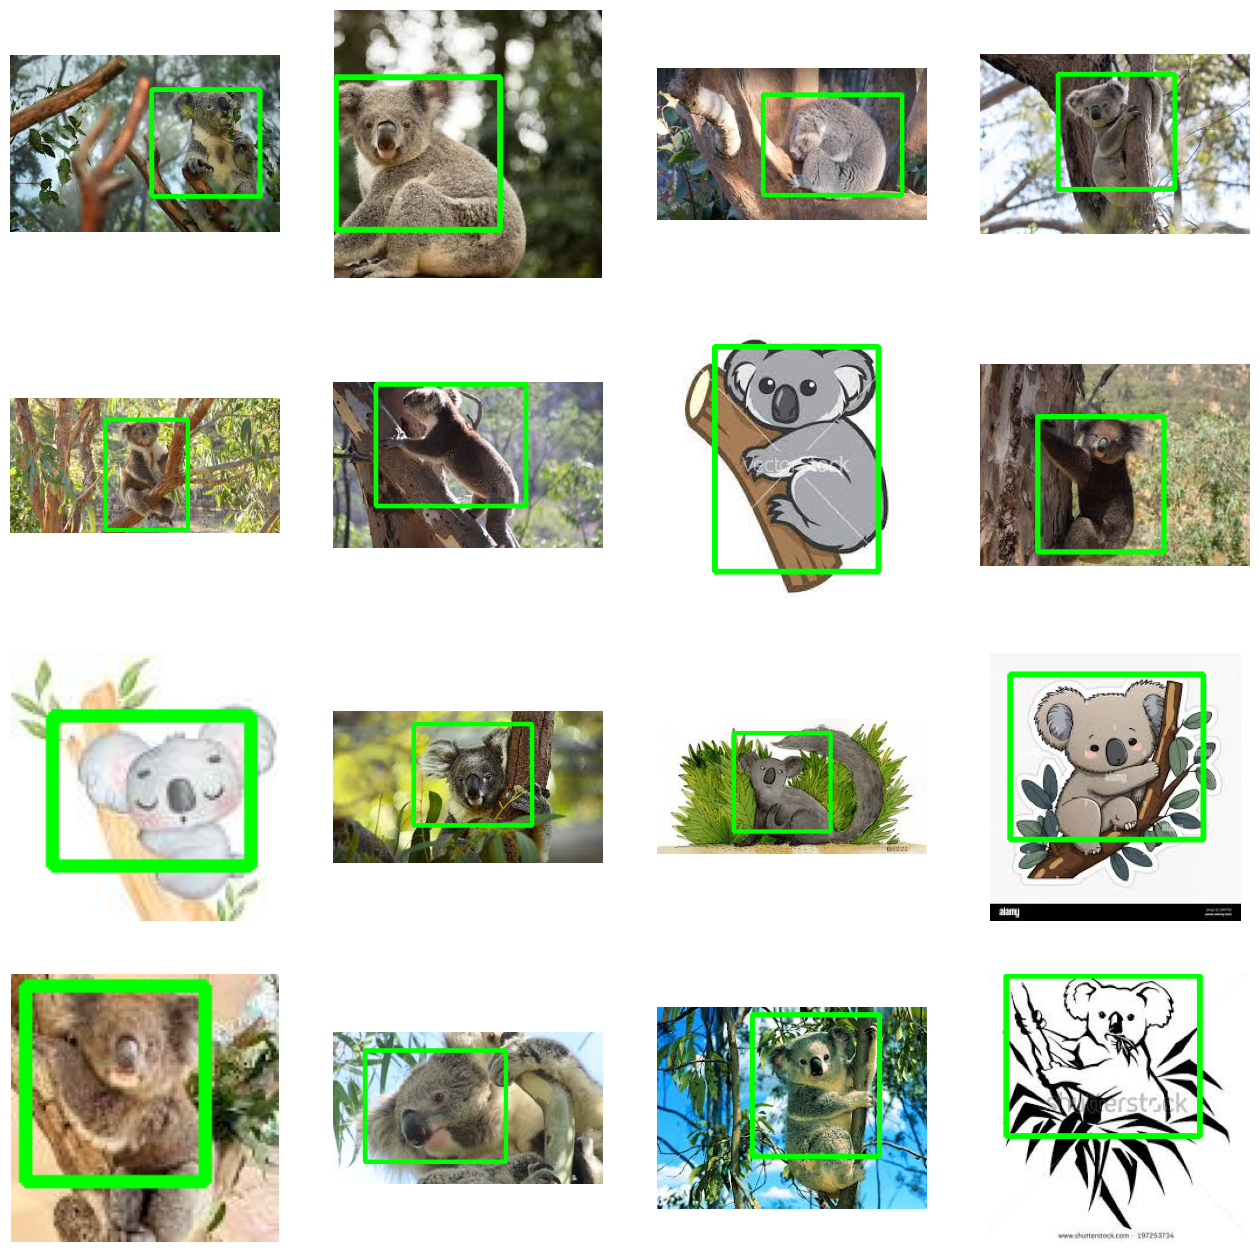

In [4]:
train_images = "C:/Users/user/Desktop/koala_detection/Data_Koala_new/images/train"
train_labels = "C:/Users/user/Desktop/koala_detection/Data_Koala_new/labels/train"

test_images = "C:/Users/user/Desktop/koala_detection/Data_Koala_new/images/test"
test_labels = "C:/Users/user/Desktop/koala_detection/Data_Koala_new/labels/test"

val_images = "C:/Users/user/Desktop/koala_detection/Data_Koala_new/images/val"

val_labels = "C:/Users/user/Desktop/koala_detection/Data_Koala_new/labels/val"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')
    
plt.show()    

In [5]:
# Load an image using OpenCV
image = cv2.imread("C:/Users/user/Desktop/koala_detection/Data_Koala_new/images/test/images (126).jpeg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 300x168 and 3 channels.


In [6]:
model=YOLO('yolov8x.pt')

model.train(data='data.yaml',
            epochs = 20,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

Ultralytics YOLOv8.0.218 🚀 Python-3.9.18 torch-2.1.1+cpu CPU (Intel Core(TM) i5-7200U 2.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=data.yaml, epochs=20, patience=50, batch=8, imgsz=168, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=

train: Scanning C:\Users\user\Desktop\koala_detection\Data_Koala_new\labels\train.cache... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<?, ?it/s]
val: Scanning C:\Users\user\Desktop\koala_detection\Data_Koala_new\labels\val.cache... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 192 train, 192 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      2.293      2.275      2.263         16        192: 100%|██████████| 14/14 [02:12<00:00,  9.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.95s/it]

                   all         44         51      0.109      0.373     0.0846     0.0235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      2.018      1.929      2.007         14        192: 100%|██████████| 14/14 [01:43<00:00,  7.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.81s/it]

                   all         44         51      0.103      0.235     0.0433    0.00905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      2.005      1.927      2.002         18        192: 100%|██████████| 14/14 [01:42<00:00,  7.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.26s/it]

                   all         44         51     0.0324      0.549     0.0314    0.00747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.978      1.855      2.045         16        192: 100%|██████████| 14/14 [01:42<00:00,  7.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.39s/it]

                   all         44         51   0.000153     0.0196   5.23e-05   5.23e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.974      2.021      2.033         11        192: 100%|██████████| 14/14 [01:40<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.22s/it]

                   all         44         51   0.000153     0.0196   5.23e-05   5.23e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      2.042      2.008      2.097         18        192: 100%|██████████| 14/14 [01:39<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.77s/it]

                   all         44         51      0.016      0.745     0.0147    0.00404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      2.018      1.931      2.054         13        192: 100%|██████████| 14/14 [01:37<00:00,  6.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.21s/it]

                   all         44         51       0.02      0.784     0.0208    0.00833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      2.236      1.888      2.238         12        192: 100%|██████████| 14/14 [01:39<00:00,  7.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.83s/it]

                   all         44         51   0.000882     0.0196   0.000451   9.02e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      2.093      1.837      2.164         28        192: 100%|██████████| 14/14 [01:46<00:00,  7.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.30s/it]

                   all         44         51     0.0105      0.098    0.00536    0.00127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G       1.98       1.76      2.154         22        192: 100%|██████████| 14/14 [01:39<00:00,  7.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.88s/it]

                   all         44         51     0.0627      0.118     0.0331    0.00783


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.971      2.053      2.286          8        192: 100%|██████████| 14/14 [01:43<00:00,  7.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.70s/it]

                   all         44         51     0.0543     0.0784     0.0179    0.00369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.914      1.947      2.197          7        192: 100%|██████████| 14/14 [01:38<00:00,  7.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.24s/it]

                   all         44         51     0.0994     0.0784     0.0274    0.00526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      2.036      1.809      2.243          7        192: 100%|██████████| 14/14 [01:35<00:00,  6.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.76s/it]

                   all         44         51     0.0407     0.0392    0.00901    0.00243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.961      1.657      2.164          6        192: 100%|██████████| 14/14 [01:48<00:00,  7.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.72s/it]

                   all         44         51      0.146      0.225      0.112     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.902      1.684       2.16          6        192: 100%|██████████| 14/14 [01:39<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.91s/it]

                   all         44         51      0.224      0.294      0.165     0.0589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.851       1.56       2.13          7        192: 100%|██████████| 14/14 [01:42<00:00,  7.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.83s/it]

                   all         44         51      0.723      0.333      0.408      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.826      1.559      2.123          6        192: 100%|██████████| 14/14 [01:40<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.58s/it]

                   all         44         51      0.675      0.412      0.435      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.804      1.487      2.076          6        192: 100%|██████████| 14/14 [01:39<00:00,  7.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.79s/it]

                   all         44         51      0.455      0.451      0.393      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.779        1.5      2.042          7        192: 100%|██████████| 14/14 [01:39<00:00,  7.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.16s/it]

                   all         44         51      0.393      0.451      0.385      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.835      1.462      2.063          7        192: 100%|██████████| 14/14 [01:40<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.66s/it]

                   all         44         51      0.408       0.51       0.42      0.142



20 epochs completed in 0.701 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 136.7MB
Optimizer stripped from runs\detect\train\weights\best.pt, 136.7MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.0.218 🚀 Python-3.9.18 torch-2.1.1+cpu CPU (Intel Core(TM) i5-7200U 2.50GHz)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.85s/it]


                   all         44         51      0.675      0.412      0.436      0.162
Speed: 0.3ms preprocess, 318.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002A86A145AC0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

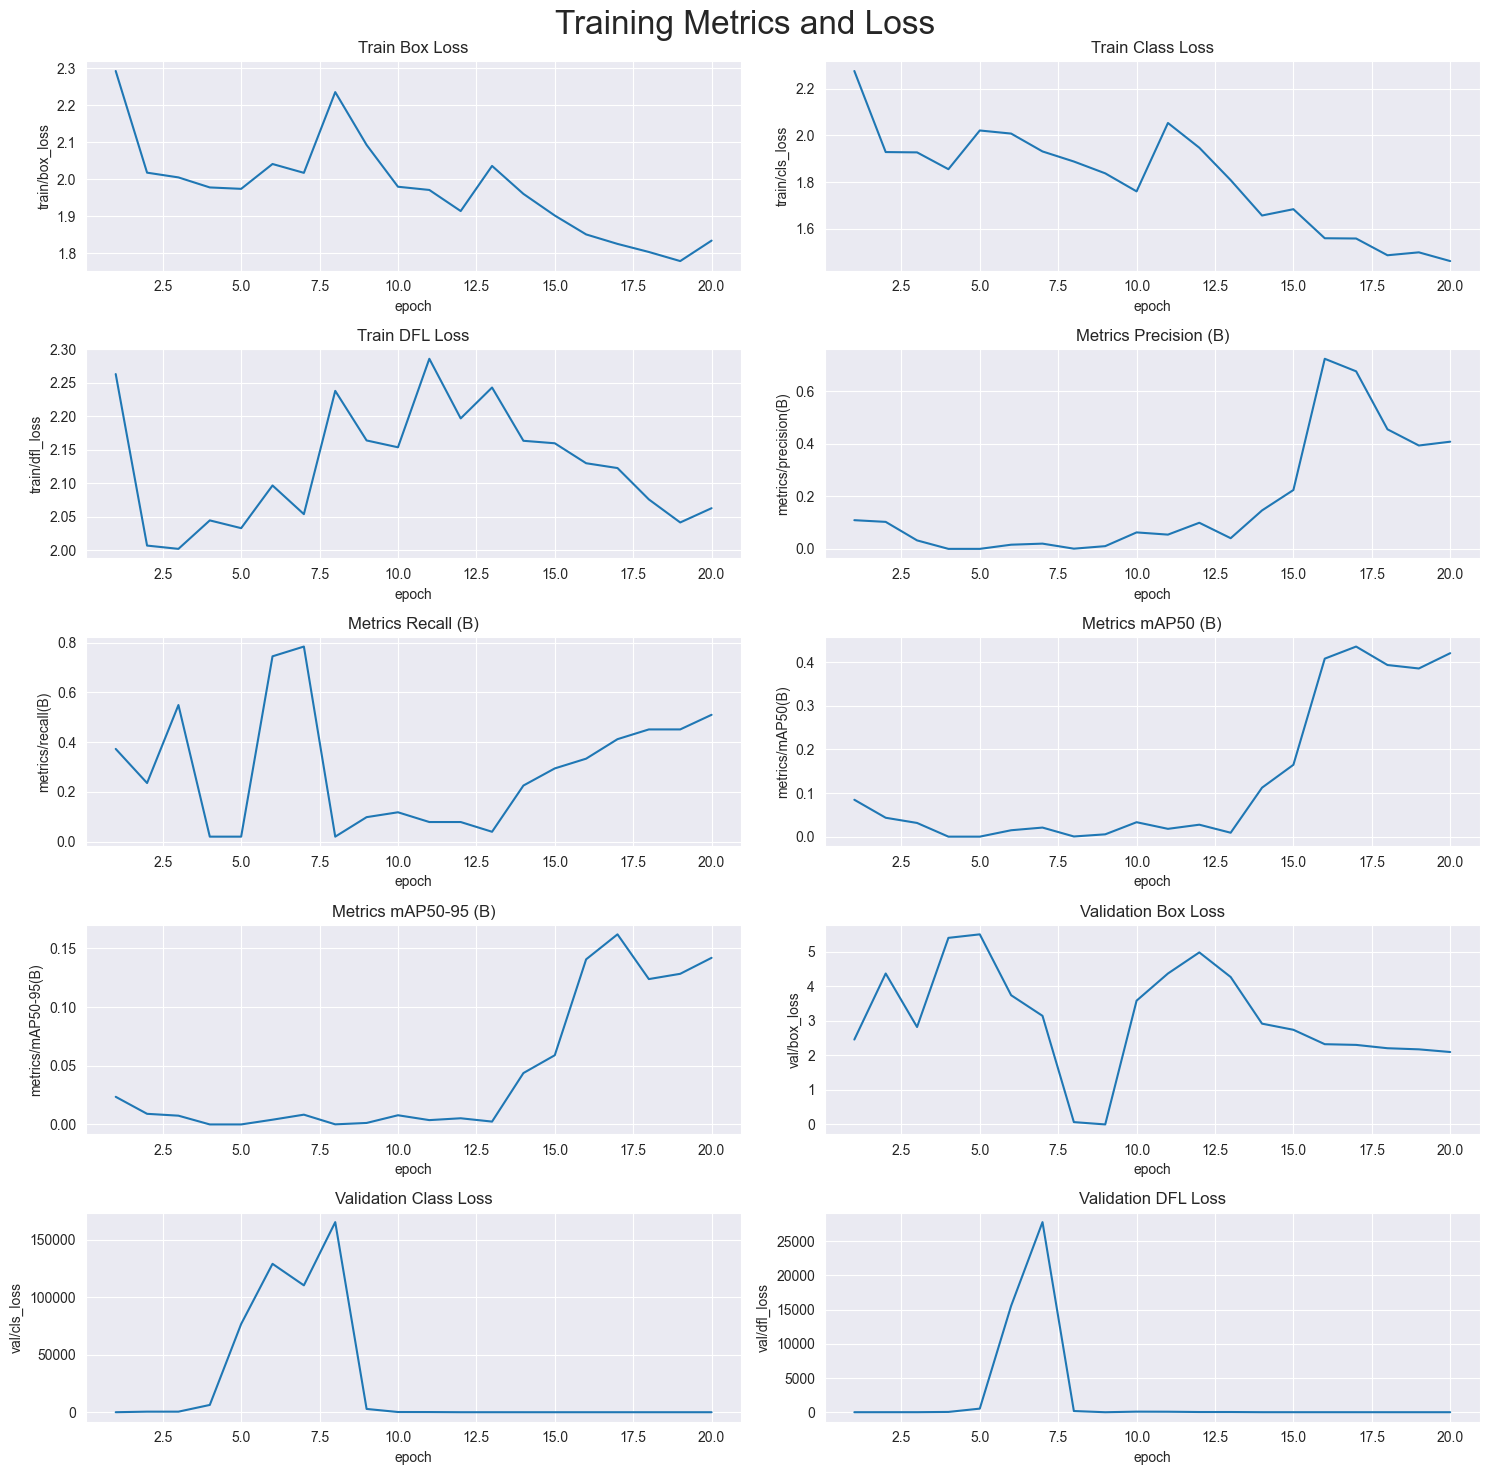

In [7]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))


sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()


In [8]:
%matplotlib inline
# Loading the best performing model
model = YOLO('runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.218 🚀 Python-3.9.18 torch-2.1.1+cpu CPU (Intel Core(TM) i5-7200U 2.50GHz)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning C:\Users\user\Desktop\koala_detection\Data_Koala_new\labels\test.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]


                   all          9         11      0.125     0.0909     0.0699     0.0559
Speed: 0.6ms preprocess, 431.4ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\val


(-0.5, 2999.5, 2249.5, -0.5)

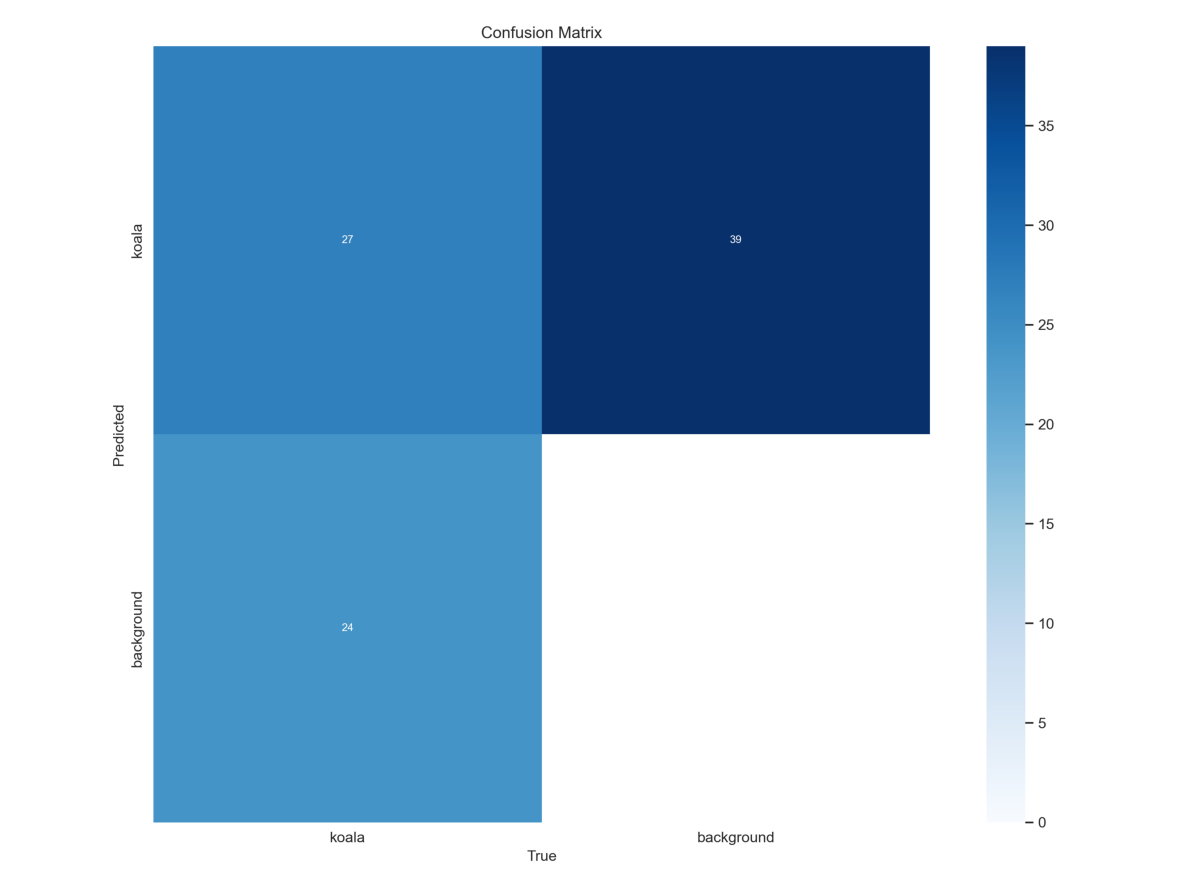

In [9]:
# Reading the confusion matrix image file
img = mpimg.imread('runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off')

In [10]:
def koala_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 192x192 (no detections), 473.7ms
Speed: 3.0ms preprocess, 473.7ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 192)

0: 192x192 2 koalas, 430.8ms
Speed: 1.0ms preprocess, 430.8ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 192)

0: 128x192 2 koalas, 367.4ms
Speed: 3.0ms preprocess, 367.4ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 192)

0: 192x192 3 koalas, 467.7ms
Speed: 1.0ms preprocess, 467.7ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 192)

0: 128x192 2 koalas, 340.1ms
Speed: 2.0ms preprocess, 340.1ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 192)

0: 160x192 1 koala, 440.8ms
Speed: 1.0ms preprocess, 440.8ms inference, 1.0ms postprocess per image at shape (1, 3, 160, 192)

0: 192x128 (no detections), 419.9ms
Speed: 1.0ms preprocess, 419.9ms inference, 0.0ms postprocess per image at shape (1, 3, 192, 128)

0: 192x192 2 koalas, 461.8ms
Speed: 1.0ms preprocess, 461.8ms inference, 1.0ms postprocess

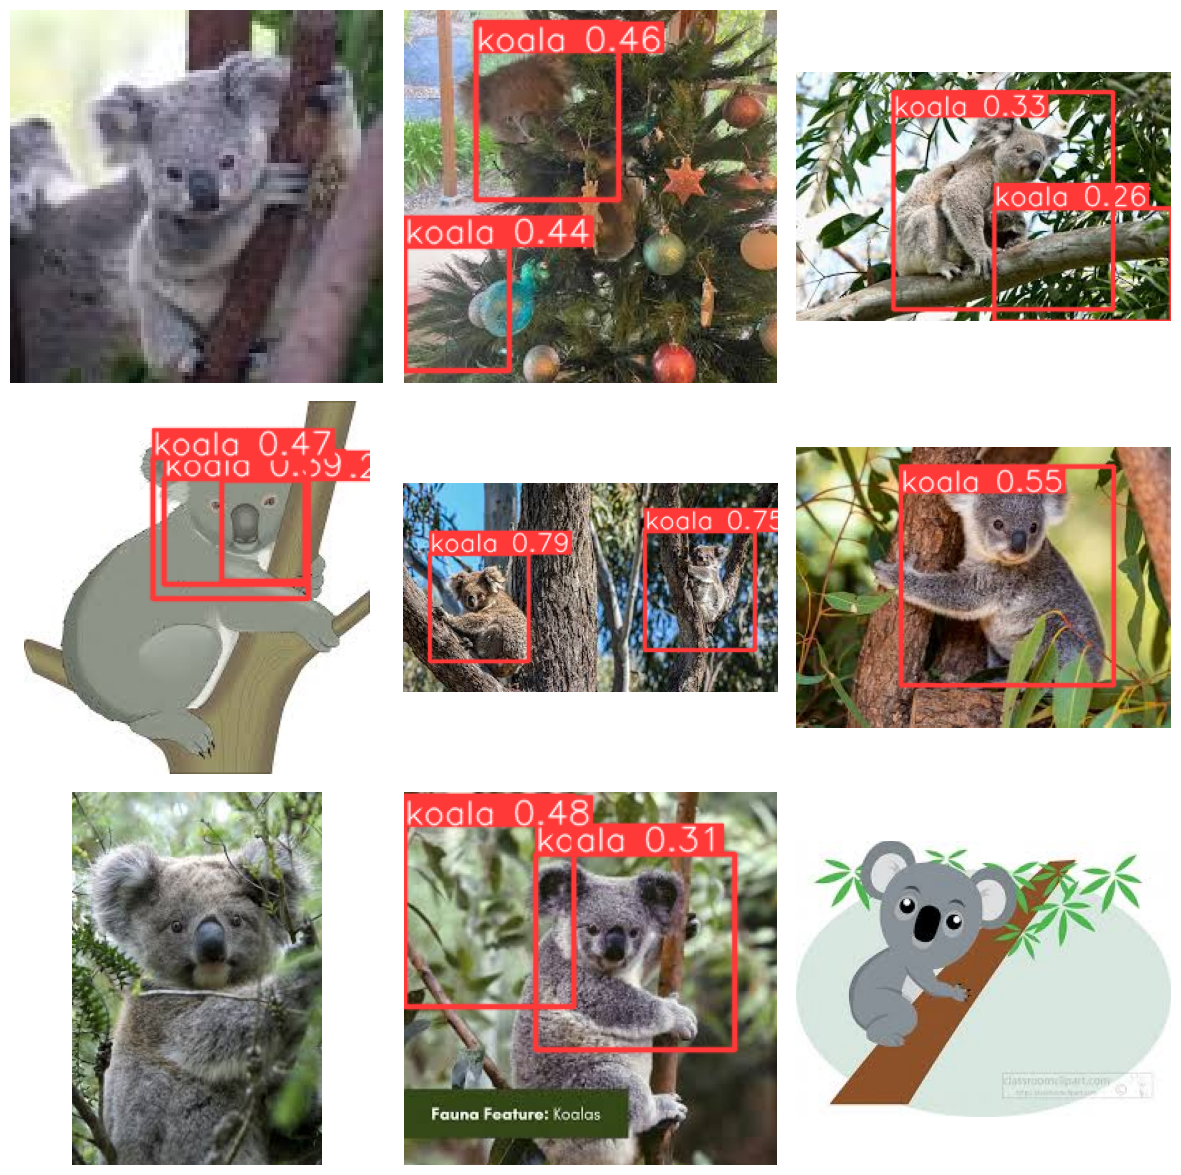

In [11]:
import random

# Define the directory where the custom images are stored
custom_image_dir = 'Data_Koala_new/images/test'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 9)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 3
    col_idx = i % 3
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = koala_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)